
Introduction to Classification and Logistic Regression
Classification is a type of supervised learning where the goal is to predict a categorical target variable. Given labeled data (input features and corresponding labels), a classification algorithm learns a decision boundary to separate data points into distinct classes. For instance, in credit risk analysis, we classify a loan application as either "low-risk" (approve) or "high-risk" (reject).

Logistic Regression is a popular statistical method for binary classification. Unlike linear regression, which predicts a continuous outcome, logistic regression predicts probabilities. This algorithm uses the logistic (sigmoid) function to map predicted values to a range between 0 and 1, which can then be thresholded to produce binary classification.





Let’s simulate the process with Python code. The hypothetical dataset has features like income, age, loan_amount, and the target variable credit_risk (1 = high risk, 0 = low risk).

In [ ]:
# Mathematics behind Logistic Model
# log(Y=1/Y=0)= 1/1+e^-x.
# for finding optimal parameters, we use log likelihood estimates. we define loss function as log loss function(cross entropy)
#The likelihood function for each point : l(i)=[pi^yi]*[1-pi]^(1-yi), using bernouli's eqn
#likelihood function for total datset= product[l(i)]  for each point, likelihood of data will be equal to product of individual likelihoods
# taking log of likelihood function, transforms it into additive form.
#finding maximum likelihood is equivalent to minimum of negative log likelihood
#we then take log of it call it log likelihood function with - sign. -L(p/y)= - sum[(yi*log(pi))+(1-yi)*(1-log(pi))].
# this is called log loss function or cross entropy.
# since closed form solution does not exist, we use gradient descent  or newton's method to find optimal parametres.
# gradient descent, we start with an initial guess for our Beta parameters, and then update them by small steps in the
#direction of lowest negative log-likelihood. After each step we can compute the loss to track the progress
#of the optimization. we stop once we achieve desired level of accuracy.

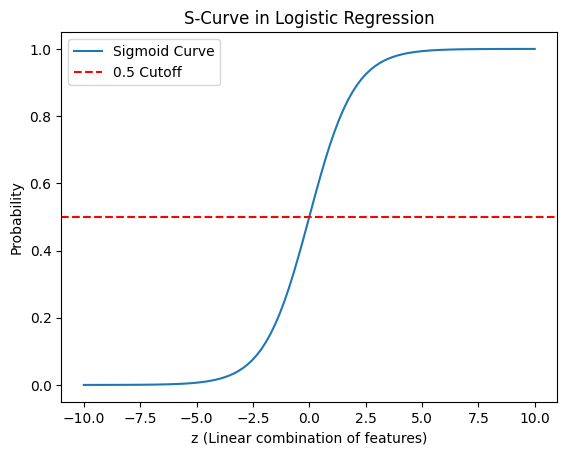

In [ ]:
# Understanding Logistic Curve
import numpy as np
import matplotlib.pyplot as plt

# Values for z (linear combination of features)
z = np.linspace(-10, 10, 100) # Creates 100 evenly spaced numbers from -10 to +10
# Sigmoid function applied to z values
sigmoid = 1 / (1 + np.exp(-z))

# Plotting the S-curve
plt.plot(z, sigmoid, label='Sigmoid Curve')
plt.axhline(y=0.5, color='r', linestyle='--', label='0.5 Cutoff')
plt.xlabel("z (Linear combination of features)")
plt.ylabel("Probability")
plt.title("S-Curve in Logistic Regression")
plt.legend()
plt.show()



The S-curve (sigmoid curve) in logistic regression is the graphical representation of the logistic function, which maps any real-valued number to a probability between 0 and 1. The curve is S-shaped, hence its name, and is mathematically represented by the function:

S(z) = 1/ 1+ e^(-z)

z is the linear combination of input features and their corresponding coefficients in the logistic regression model.

The S-curve helps in transforming the linear combination of features into probabilities for classification, where:

The middle of the curve is centered around a probability of 0.5.
As the values of z increase (positive values), the probability approaches 1.
As z decreases (negative values), the probability approaches 0.

Explanation of the 0.5 Cutoff
In logistic regression, a 0.5 cutoff is typically used to classify predictions:

If the probability of a prediction is ≥ 0.5, we classify it as 1 (e.g., high-risk in a credit risk model).
If the probability is < 0.5, we classify it as 0 (e.g., low-risk).

At a probability of 0.5, the first derivative (slope) of the logistic sigmoid function indeed approaches 0, meaning it reaches its point of inflection. This is the point where the curve changes from being concave to convex, and it has some important implications:

1. Maximum Sensitivity to Changes
Around the 0.5 mark, the S-curve is steepest, making the model very sensitive to small changes in the input feature values. This steep slope around 0.5 allows logistic regression to best separate data points close to the decision boundary, as even minor adjustments in feature values can significantly affect the probability outcome.

2. Interpretation of the Point of Inflection
The inflection point is where the model is least certain about classifications (probability close to 50%) and represents the threshold where the likelihood of either class (0 or 1) is nearly equal. In binary classification, it makes sense to set the cutoff at this balanced point unless we have a specific reason to favor one class.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create hypothetical data
data = {
    'F1': [10, 20, 15, 25, 12, 18, 22, 16, 28, 14],
    'F2': [5, 8, 6, 9, 4, 7, 10, 6, 12, 5],
    'F3': [3, 2, 4, 1, 3, 2, 5, 3, 1, 4],
    'Churn': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0]  # 0: No churn, 1: Churn
}
df = pd.DataFrame(data)

# Separate features (X) and target (y)
X = df[['F1', 'F2', 'F3']]
y = df['Churn']

# Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Predict on the same dataset (training data)
predictions = model.predict(X)

# Evaluate the model
accuracy = accuracy_score(y, predictions)
report = classification_report(y, predictions)

# Print predictions and evaluation metrics
print("Predictions:", predictions)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Predictions: [0 1 0 1 0 0 1 0 1 0]
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



Classification Report: A Comprehensive Evaluation Tool

The classification report is a performance evaluation metric that provides a detailed breakdown of a classification model's performance for each class. It offers insights beyond simple accuracy by including precision, recall, F1-score, and support.

Understanding the Metrics

Precision: Measures the accuracy of positive predictions. It answers the question: "Of all the data points predicted as positive, how many were actually positive?" The formula for precision is:

Precision = True Positives / (True Positives + False Positives)
Use code with caution
Recall (Sensitivity): Measures the ability of a model to find all the relevant cases within a dataset. It answers the question: "Of all the data points that are actually positive, how many were correctly identified as positive?" The formula for recall is:

Recall = True Positives / (True Positives + False Negatives)
Use code with caution
F1-score: The harmonic mean of precision and recall, providing a balanced measure of both metrics. It's particularly useful when dealing with imbalanced datasets. The formula for the F1-score is:

F1-score = 2 * (Precision * Recall) / (Precision + Recall)
Use code with caution
Support: The number of actual instances in each class. It provides context for the other metrics, especially when dealing with imbalanced datasets.
Interpreting the Classification Report

The classification report is typically presented in a tabular format, with each row representing a class and columns for precision, recall, F1-score, and support.

Here's how to interpret the report:

High precision: Indicates that the model makes very few false positive predictions for that class.
High recall: Indicates that the model correctly identifies most of the actual positive instances for that class.
High F1-score: Suggests a good balance between precision and recall for that class.
Low support: Indicates that there are relatively few instances of that class in the dataset, which can affect the reliability of the metrics for that class.
Using the Classification Report

The classification report is valuable for:

Comparing models: You can compare the performance of different models on the same dataset by looking at their respective classification reports.

Identifying weaknesses: The report highlights classes where the model struggles, allowing you to focus on improving performance for those specific classes.

Understanding trade-offs: It helps you understand the trade-offs between precision and recall, enabling you to choose the best model based on your specific needs.

classification report generated by sklearn.metrics:

Global Average (Accuracy)
Meaning: This represents the overall accuracy of the model across all classes. It's the ratio of correctly classified instances to the total number of instances.

Calculation: Accuracy = (Number of correct predictions) / (Total number of predictions)

When to use: Accuracy is a good general indicator of model performance, especially when the classes are balanced. However, it can be misleading when dealing with imbalanced datasets where one class is much more frequent than others.

Macro Average
Meaning: This calculates the average precision, recall, or F1-score across all classes without considering class imbalances.

Weighted Avergae:
Class-Wise Accuracies:
Weighted average accuracy is a way to calculate the overall performance of a classification model when dealing with imbalanced datasets. In imbalanced datasets, some classes have significantly more instances than others, which can lead to misleading accuracy scores if calculated using traditional methods.

Let's say you have a model for credit risk classification with two classes: "low risk" and "high risk." Your dataset is imbalanced, with 90% low-risk instances and 10% high-risk instances. Here's how you might calculate the weighted average accuracy:

Low-Risk Accuracy: 95%
High-Risk Accuracy: 60%
Weights:

Low Risk: 0.9 (proportional to its frequency in the dataset)
High Risk: 0.1 (proportional to its frequency in the dataset)
Weighted Average Accuracy: (0.9 * 0.95) + (0.1 * 0.60) = 0.915 or 91.5%

In this example, the weighted average accuracy (91.5%) provides a more balanced representation of the model's performance compared to a simple average accuracy, which might have been much higher due to the model's high accuracy on the majority class.



In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Data
# Hypothetical Data Generation
np.random.seed(42)
data = pd.DataFrame({
    'income': np.random.normal(50000, 15000, 1000),
    'age': np.random.normal(40, 10, 1000),
    'loan_amount': np.random.normal(15000, 5000, 1000),
    'credit_risk': np.random.binomial(1, 0.5, 1000)
})
data.head()

,income,age,loan_amount,credit_risk
0,57450.712295,53.993554,11624.108625,1
1,47926.035482,49.246337,14277.406646,1
2,59715.328072,40.596304,11037.900395,0
3,72845.447846,33.530632,13460.192352,1
4,46487.699379,46.982233,5531.926665,0


In [ ]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X = data[['income', 'age', 'loan_amount']]
y = data['credit_risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())


           income        age   loan_amount
541  33054.397180  57.722516   8707.475447
440  55760.981734  46.628813  23747.919521
482  25903.305196  57.269639  24962.576766
422  46265.537773  36.350473  13853.046280
778  48883.498563  35.706978  14691.179001
541    1
440    1
482    1
422    1
778    1
Name: credit_risk, dtype: int64
           income        age   loan_amount
521  58150.402886  45.820977  29926.295013
737  64740.364759  29.321971  16711.689172
740  22386.886530  38.955508  17074.327502
660  41395.069897  53.171151   9122.026972
411  33130.368622  45.562300  22689.659592
521    0
737    0
740    0
660    1
411    0
Name: credit_risk, dtype: int64


In this code:

We generate synthetic data with features income, age, and loan_amount.
We split the data into training and testing sets using train_test_split.


In [ ]:
# Initializing and training the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Interpretation
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: [-0.54228695]
Coefficients: [[-4.16804968e-06  1.33764324e-02  1.12984390e-05]]


In [ ]:
# Predictions on test set

y_pred = model.predict(X_test) # this will predict the labels
y_pred_proba = model.predict_proba(X_test)[:, 1] # this will predict the probabilities of 1

print(y_pred[:5])
print(y_pred_proba[:5])


[1 0 1 1 1]
[0.54149954 0.44248357 0.51959056 0.52484984 0.54622829]


:

y_pred = model.predict(X_test):

This line uses the trained model (model) to make predictions on the test data (X_test).
The predict() method of the model is called, which takes the test data as input and returns an array of predicted labels (y_pred).
These labels represent the model's classification of each data point in the test set (e.g., 0 or 1 for binary classification).
y_pred_proba = model.predict_proba(X_test)[:, 1]:

This line uses the trained model (model) to obtain predicted probabilities on the test data (X_test).
The predict_proba() method is called, which returns an array of probabilities for each data point belonging to each class.
[:, 1] is used to select only the probabilities for the positive class (class 1 in binary classification). This assumes a binary classification scenario where the probabilities for class 0 and class 1 are returned in columns 0 and 1, respectively.
y_pred_proba stores these probabilities for the positive class.
print(y_pred[:5]):

To get the model predicted probabilities for class 0.
y_pred_proba_0 = model.predict_proba(X_test)[:, 0]
print(y_pred_proba_0[:5])

This line prints the first 5 predicted labels from y_pred. This allows you to see the model's classifications for the first 5 data points in the test set.
print(y_pred_proba[:5]):

This line prints the first 5 predicted probabilities from y_pred_proba. This shows the model's confidence in its predictions for the positive class for the first 5 data points in the test set.

Accuracy: 0.4866666666666667
Precision: 0.4666666666666667
Recall: 0.3835616438356164
ROC AUC: 0.4572584949297278


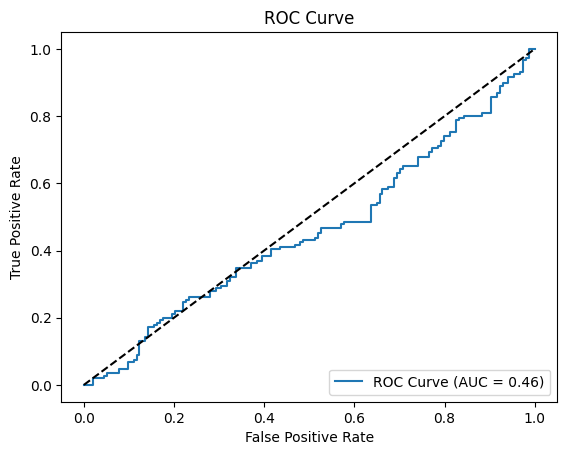

In [ ]:
# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)

# Plotting the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


Understanding the Metrics

Precision: Precision measures the accuracy of positive predictions. It answers the question: "Of all the data points predicted as positive, how many were actually positive?" The formula for precision is:Precision = True Positives / (True Positives + False Positives).

Recall (Sensitivity): Recall measures the ability of a model to find all the relevant cases within a dataset. It answers the question: "Of all the data points that are actually positive, how many were correctly identified as positive?" The formula for recall is: Recall = True Positives / (True Positives + False Negatives)

ROC Curve (Receiver Operating Characteristic Curve): The ROC curve is a graphical representation of the performance of a binary classification model at various classification thresholds. It plots the True Positive Rate (TPR, which is the same as recall) against the False Positive Rate (FPR) at different threshold settings.

AUC (Area Under the ROC Curve): AUC is a single number that summarizes the performance of the ROC curve. It represents the probability that the model will rank a randomly chosen positive instance higher than a randomly chosen negative instance. A higher AUC generally indicates a better-performing model.

The ROC curve would likely be close to the diagonal line (the line representing random guessing). This is because the model is not effectively distinguishing between positive and negative classes.
The AUC would be close to 0.5, further indicating that the model's performance is no better than random chance.
    


Explanation of Evaluation Metrics:

Accuracy: Measures the proportion of correctly classified instances.
Precision: The ratio of true positives to the sum of true positives and false positives. It tells how many positively classified instances are actually positive.
Recall: The ratio of true positives to the sum of true positives and false negatives. It represents how well the model captures positive instances.
ROC Curve and AUC: The ROC curve plots True Positive Rate (Recall) against False Positive Rate. The Area Under the Curve (AUC) indicates the model’s ability to distinguish between classes (0.5 represents random guessing, while 1 represents perfect classification).

In [ ]:
# New  data
new_data = pd.DataFrame({
    'income': [55000, 30000],
    'age': [35, 45],
    'loan_amount': [20000, 10000]
})

# Predicting credit risk for new data
new_predictions = model.predict(new_data)
new_predictions_proba = model.predict_proba(new_data)[:, 1]

print(new_predictions)
print(new_predictions_proba)


[0 1]
[0.48066321 0.51189661]


Uploading a new File from your machine Home - Upload https://docs.google.com/document/d/1NF4zMZsXJeJuoUfT2AzBPJYCmFxJrpbAd5I2dpGXN0M/edit?usp=sharing

Open the Jupyter Notebook: Launch Jupyter Notebook and navigate to the directory where you want to upload the file.
2.Click "Upload": In the Jupyter Notebook dashboard, you'll find an "Upload" button in the top right corner. Click it.

3.Select the file: A file selection dialog will open. Choose the file you want to upload from your local system.

4.Click "Upload": Once you've selected the file, click the "Upload" button in the dialog.

5.Confirmation: The file will be uploaded to the current directory in your Jupyter Notebook environment. You should see the file name appear in the file list.

6.import pandas as pd

df = pd.read_csv('your_file_name.csv')

df.head()

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Uploading car_data
file_path = '/content/drive/MyDrive/ML_Python/CreditRiskData.csv'

df = pd.read_csv(file_path)
print(df.head())

Mounted at /content/drive
   GoodCredit checkingstatus  duration history purpose  amount savings employ  \
0           0            A11         6     A34     A43    1169     A65    A75   
1           1            A12        48     A32     A43    5951     A61    A73   
2           0            A14        12     A34     A46    2096     A61    A74   
3           0            A11        42     A32     A42    7882     A61    A74   
4           1            A11        24     A33     A40    4870     A61    A73   

   installment status  ... residence  property age  otherplans housing cards  \
0            4    A93  ...         4      A121  67        A143    A152     2   
1            2    A92  ...         2      A121  22        A143    A152     1   
2            2    A93  ...         3      A121  49        A143    A152     1   
3            2    A93  ...         4      A122  45        A143    A153     1   
4            3    A93  ...         4      A124  53        A143    A153     2   

    jo

Data description
The business meaning of each column in the data is as below

GoodCredit: Whether the issued loan was a good decision or bad
checkingstatus: Status of existing checking account.
duration: Duration of loan in months
history: Credit history of the applicant
purpose: Purpose for the loan
amount: Credit amount
savings: Savings account/bonds
employ: Present employment since
installment: Installment rate in percentage of disposable income
status: Personal status and sex
others: Other debtors / guarantors for the applicant
residence: Present residence since
property: Property type of applicant
age: Age in years
otherplans: Other installment plans
housing: Housing
cards: Number of existing credits at this bank
job: Job
liable: Number of people being liable to provide maintenance for
tele: Is the Telephone registered or not
foreign: Is the applicant a foreign worker

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GoodCredit      1000 non-null   int64 
 1   checkingstatus  1000 non-null   object
 2   duration        1000 non-null   int64 
 3   history         1000 non-null   object
 4   purpose         1000 non-null   object
 5   amount          1000 non-null   int64 
 6   savings         1000 non-null   object
 7   employ          1000 non-null   object
 8   installment     1000 non-null   int64 
 9   status          1000 non-null   object
 10  others          1000 non-null   object
 11  residence       1000 non-null   int64 
 12  property        1000 non-null   object
 13  age             1000 non-null   int64 
 14  otherplans      1000 non-null   object
 15  housing         1000 non-null   object
 16  cards           1000 non-null   int64 
 17  job             1000 non-null   object
 18  liable   

In [ ]:
# Finding how many missing values are there for each column
df.isnull().sum()

,0
GoodCredit,0
checkingstatus,0
duration,0
history,0
purpose,0
amount,0
savings,0
employ,0
installment,0
status,0


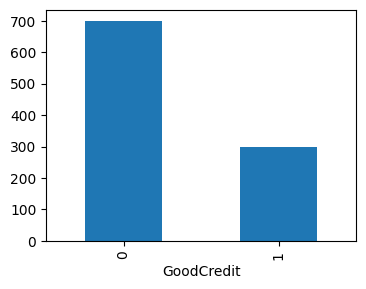

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Creating Bar chart as the Target variable is Categorical
GroupedData=df.groupby('GoodCredit').size()
GroupedData.plot(kind='bar', figsize=(4,3))
plt.show()

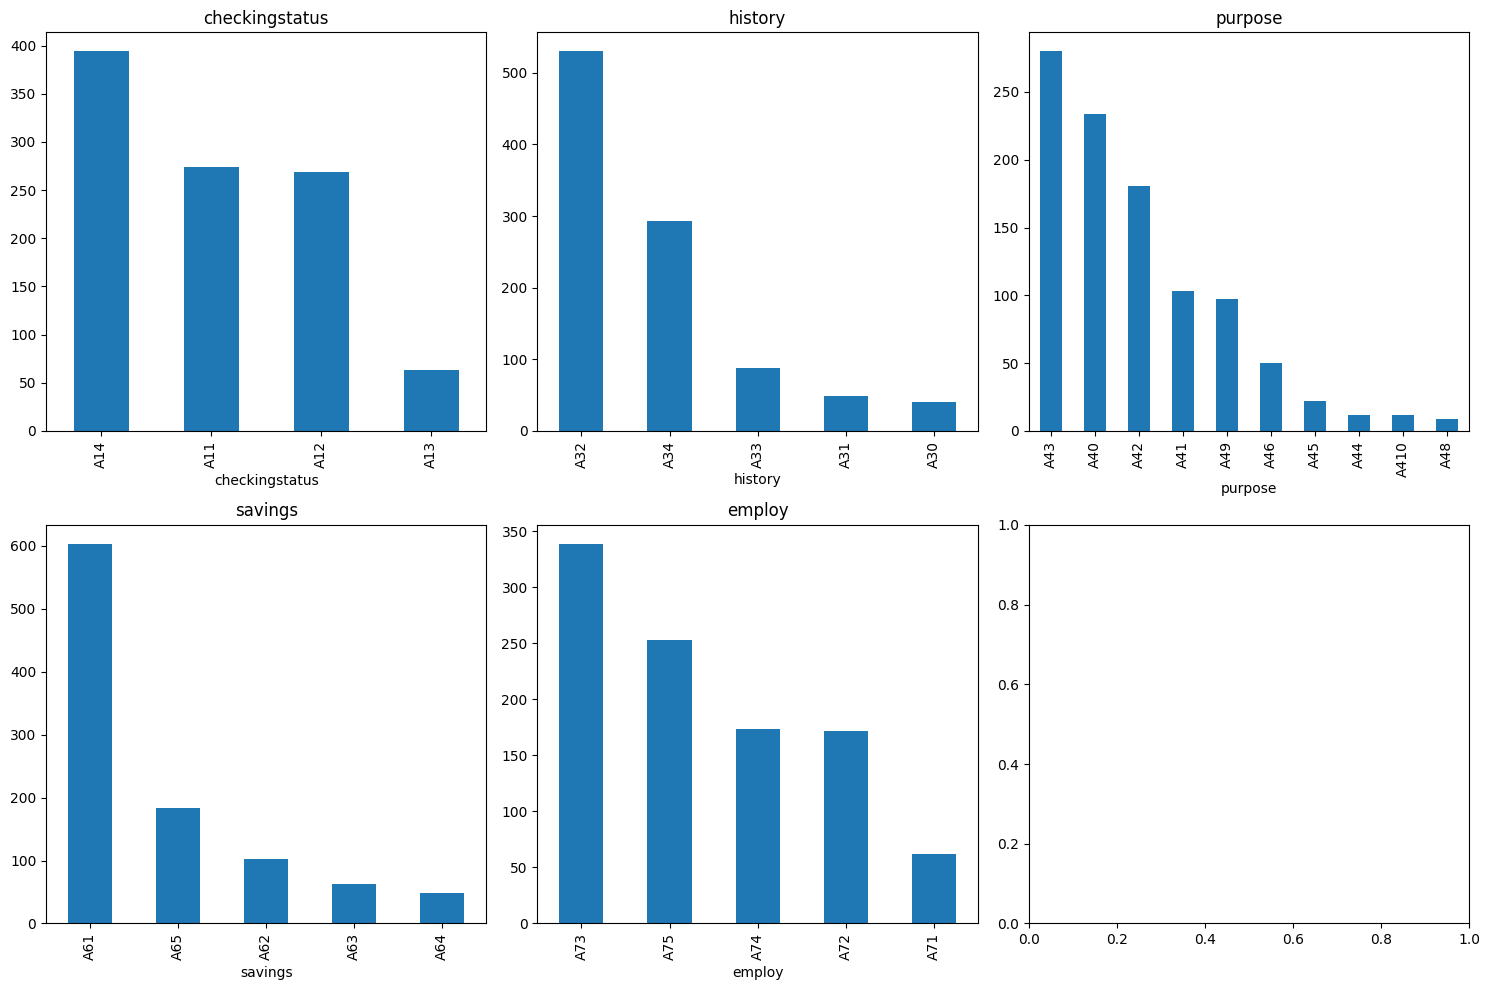

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'

# Columns to plot
cols_to_plot = ['checkingstatus', 'history', 'purpose', 'savings', 'employ']

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot the bar charts on the subplots
for i, col in enumerate(cols_to_plot):
    df[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)  # Set title for each subplot


plt.tight_layout()  # Adjust spacing between subplots
plt.show()

axes = axes.flatten()

plt.subplots Returns a Grid:

When you use plt.subplots to create multiple subplots, it returns a Figure object and an array (or a nested array if you have more than one row and column) containing the Axes objects for each subplot.
Think of it like a grid of plots. If you create a 2x3 grid, you'll have a 2D array representing the Axes.
Easy Iteration:

axes.flatten() takes this grid-like structure (the potentially multi-dimensional array of Axes) and converts it into a simple 1-dimensional array.
This makes it much easier to iterate through each subplot using a single loop.
Accessing Subplots Sequentially:

By flattening the axes array, you can access each subplot using its index within the flattened array (axes[i]).
This way, you don't need to deal with nested loops or complex indexing to plot on specific subplots.
In essence, axes = axes.flatten() is a convenience step that simplifies the process of plotting data on multiple subplots by providing a straightforward way to access each subplot in a loop.

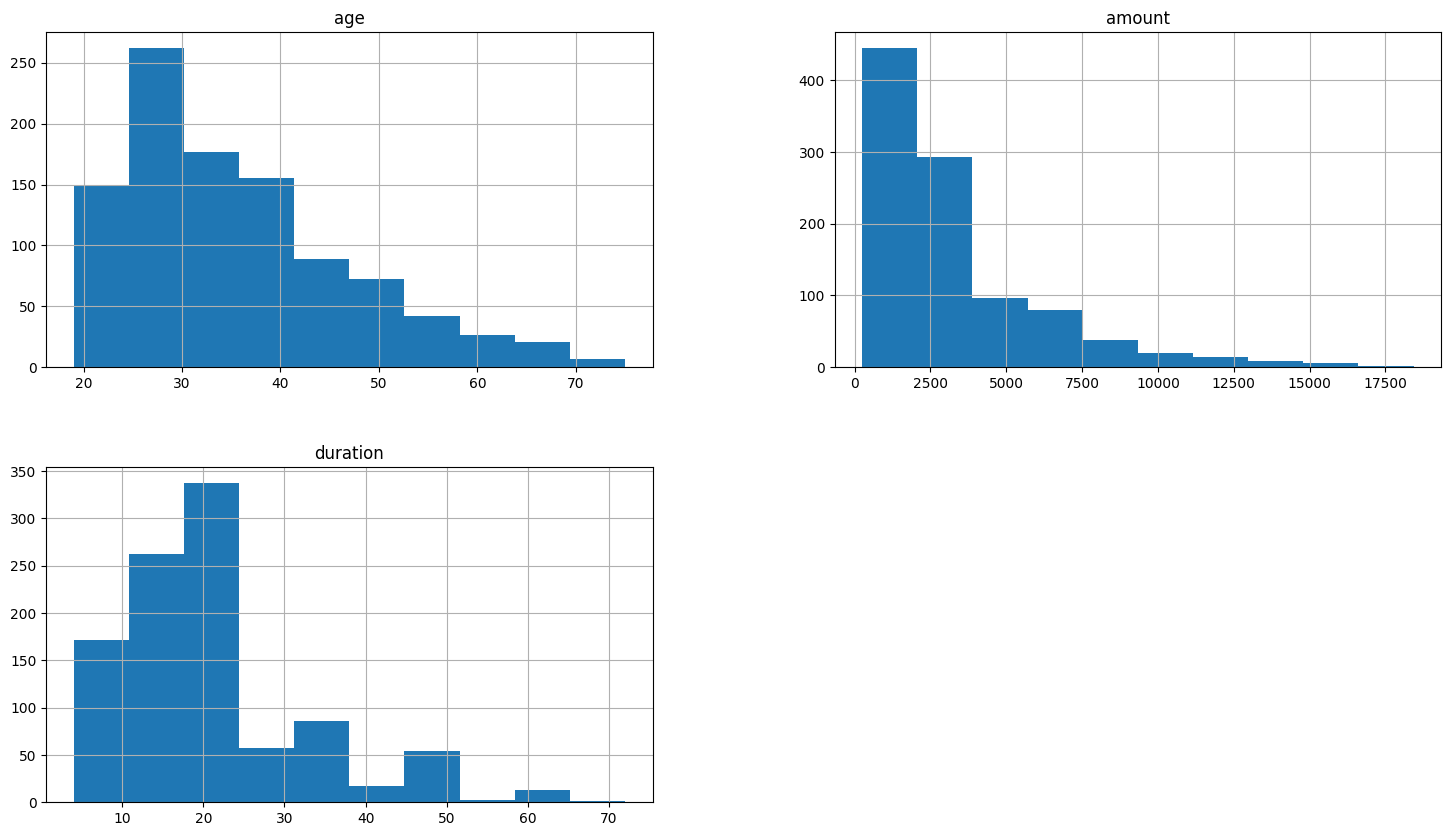

In [ ]:
# Plotting histograms of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
df.hist(['age', 'amount','duration'], figsize=(18,10))
plt.show()

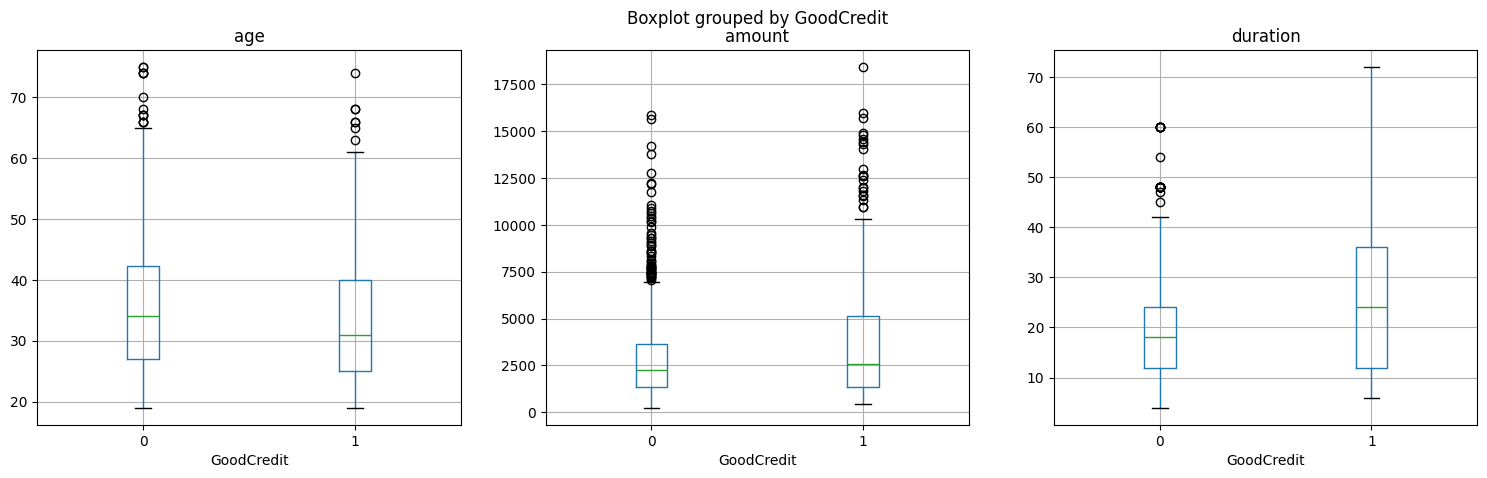

In [ ]:
# Box plots for Categorical Target Variable "GoodCredit" and continuous predictors
ContinuousColsList=['age','amount', 'duration']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "GoodCredit"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    df.boxplot(column=PredictorCol, by='GoodCredit', figsize=(5,5), vert=True, ax=PlotCanvas[i])

plt.show()

Explanation

fig, PlotCanvas = plt.subplots(...): This line creates a figure (fig) and an array of subplots (PlotCanvas).

nrows=1, ncols=len(ContinuousColsList): This creates a single row of subplots, with the number of columns equal to the number of continuous variables you want to plot.
figsize=(18, 5): This sets the size of the overall figure.
for PredictorCol, i in zip(...): This loop iterates through each continuous variable (PredictorCol) and its corresponding index (i).

df.boxplot(...): This is the core of the code, where the box plots are created using the boxplot() method of the pandas DataFrame (df).

column=PredictorCol: This specifies the continuous variable to be plotted on the y-axis.
by='GoodCredit' : This indicates that the box plots should be grouped by the categories in the 'GoodCredit' column (your categorical variable).
figsize=(5, 5): This sets the size of each individual subplot.
vert=True: This makes the box plots vertical (as opposed to horizontal).
ax=PlotCanvas[i]: This is crucial – it tells the boxplot() function to draw the plot on the i-th subplot (Axes object) within the PlotCanvas array.
plt.show(): This line displays the created figure with all the box plots.

fig.PlotCanvas (Clarification)

In Matplotlib, you don't usually refer to the subplot array as fig.PlotCanvas. The variable name PlotCanvas is simply a choice made in this specific code.
PlotCanvas is essentially an array (or a nested array) containing the Axes objects (individual subplots). By iterating through this array and using ax=PlotCanvas[i], you're directing each box plot to be drawn on the corresponding subplot.

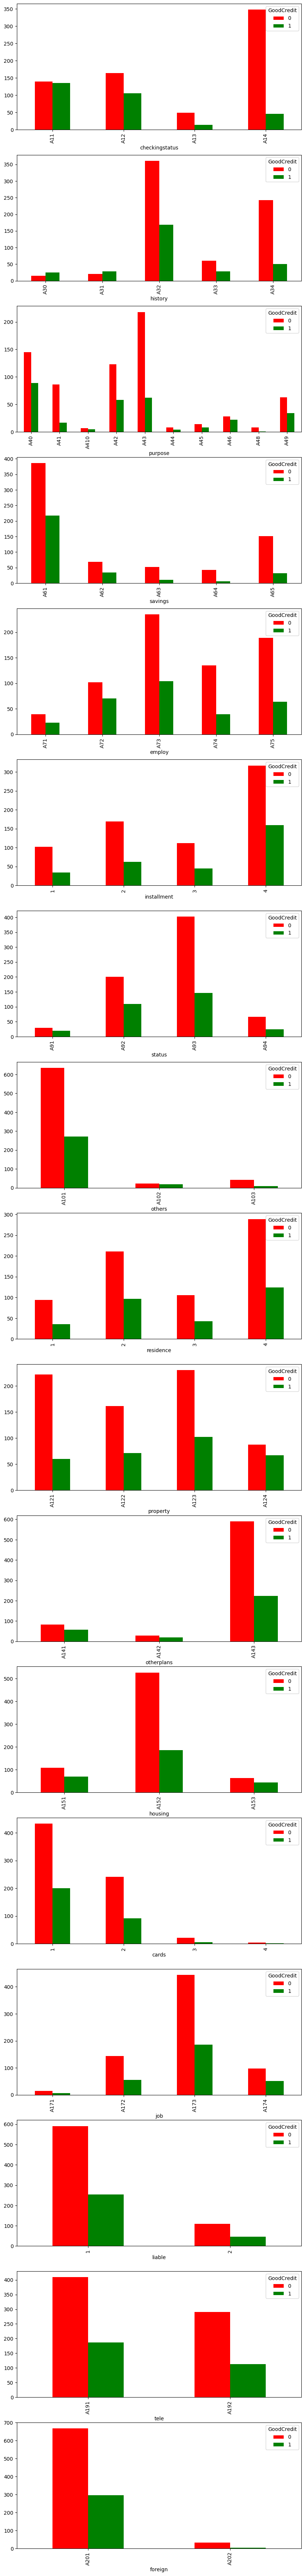

In [ ]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['checkingstatus', 'history', 'purpose','savings','employ',
                     'installment', 'status', 'others','residence', 'property',
                     'otherplans', 'housing', 'cards', 'job', 'liable', 'tele', 'foreign']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,90))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "GoodCredit"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=df[CategoricalCol], columns=df['GoodCredit'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i])

plt.show()

 create multiple grouped bar charts, each showing the relationship between a categorical predictor variable and the target variable ('GoodCredit'). Grouped bar charts are useful for comparing the distributions of the target variable across different categories of the predictor variables.

CategoricalColsList: This list contains the names of the categorical columns you want to visualize against the target variable ('GoodCredit').

fig, PlotCanvas = plt.subplots(...): This line creates a figure (fig) and an array of subplots (PlotCanvas).

nrows=len(CategoricalColsList), ncols=1: This creates a column of subplots, with the number of rows equal to the number of categorical variables you want to plot.
figsize=(10, 90): This sets the size of the overall figure. You might need to adjust this based on the number of categorical variables you're plotting to ensure the plots are readable.
for CategoricalCol, i in zip(...): This loop iterates through each categorical variable (CategoricalCol) and its corresponding index (i).

CrossTabResult = pd.crosstab(...): This line uses the pd.crosstab() function to create a cross-tabulation (contingency table) between the current categorical variable (CategoricalCol) and the target variable ('GoodCredit'). This table shows the frequency of each combination of categories.

CrossTabResult.plot.bar(...): This line creates the grouped bar chart using the data from the cross-tabulation.

color=['red', 'green']: This sets the colors for the bars representing the different categories of the target variable ('GoodCredit').
ax=PlotCanvas[i]: This directs the plot to be drawn on the i-th subplot (Axes object) within the PlotCanvas array.
plt.show(): This line displays the created figure with all the grouped bar charts.

In [ ]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=df['checkingstatus'], columns=df['GoodCredit'])
CrossTabResult

GoodCredit,0,1
checkingstatus,,
A11,139,135
A12,164,105
A13,49,14
A14,348,46


In [ ]:
# Treating all the nominal variables at once using dummy variables.
df_Numeric=pd.get_dummies(df)

# Adding Target Variable to the data
df_Numeric['GoodCredit']=df['GoodCredit']

# Printing sample rows
df_Numeric.head()


,GoodCredit,duration,amount,installment,residence,age,cards,liable,checkingstatus_A11,checkingstatus_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,tele_A191,tele_A192,foreign_A201,foreign_A202
0,0,6,1169,4,4,67,2,1,True,False,...,True,False,False,False,True,False,False,True,True,False
1,1,48,5951,2,2,22,1,1,False,True,...,True,False,False,False,True,False,True,False,True,False
2,0,12,2096,2,3,49,1,2,False,False,...,True,False,False,True,False,False,True,False,True,False
3,0,42,7882,2,4,45,1,2,True,False,...,False,True,False,False,True,False,True,False,True,False
4,1,24,4870,3,4,53,2,2,True,False,...,False,True,False,False,True,False,True,False,True,False


Logistic regression, like many other statistical models, works best with numerical data. Nominal variables, which represent categories without any inherent order (e.g., "red," "green," "blue"), cannot be directly used in logistic regression. This is because the model interprets numerical values as having a meaningful order and magnitude, which is not applicable to nominal categories.

To overcome this, we create dummy variables, also known as indicator variables, which represent each category of the nominal variable with a binary (0 or 1) value. This allows the model to treat each category as a separate feature and estimate its effect on the target variable.

Steps

Here's a breakdown of the process using pandas and scikit-learn:

Identify nominal variables: Examine your dataset and identify the columns containing categorical data with no inherent order (nominal variables). In your code example, nominal variables like checkingstatus, history, purpose, etc., are already identified and used for creating dummy variables.

Create dummy variables using pandas get_dummies: This function converts nominal variables into a set of dummy variables. Each dummy variable represents a unique category within the original nominal variable.

Use dummy variables in Logistic Regression: When initializing and fitting your Logistic Regression model, use the DataFrame containing the dummy variables instead of the original DataFrame.

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='GoodCredit'
Predictors=['duration', 'installment', 'age', 'amount']

X=df_Numeric[Predictors].values
y=df_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
clf = LogisticRegression()

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


              precision    recall  f1-score   support

           0       0.71      0.99      0.83       208
           1       0.80      0.09      0.16        92

    accuracy                           0.71       300
   macro avg       0.76      0.54      0.49       300
weighted avg       0.74      0.71      0.62       300

[[206   2]
 [ 84   8]]
Accuracy of the model on Testing Sample Data: 0.62


Precision:

Meaning: For each class (0 and 1 in your case), precision measures the accuracy of the positive predictions. It answers the question: "Of all the data points predicted as belonging to this class, how many were actually correct?"
Calculation: Precision = True Positives / (True Positives + False Positives)
Recall (Sensitivity):

Meaning: Recall measures the ability of the model to find all the relevant cases within a dataset. It answers the question: "Of all the data points that actually belong to this class, how many were correctly identified?"
Calculation: Recall = True Positives / (True Positives + False Negatives)
F1-score:

Meaning: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of both metrics, especially useful when dealing with imbalanced datasets.
Calculation: F1-score = 2 * (Precision * Recall) / (Precision + Recall)
Support:

Meaning: The support is the number of actual instances in each class. It provides context for the other metrics, especially when dealing with imbalanced datasets.
Accuracy:

Meaning: This represents the overall accuracy of the model across all classes. It's the ratio of correctly classified instances to the total number of instances.
Calculation: Accuracy = (Number of correct predictions) / (Total number of predictions)
Macro Average:

Meaning: This calculates the average precision, recall, or F1-score across all classes without considering class imbalances. It simply takes the arithmetic mean of the scores for each class.
Weighted Average:

Meaning: This calculates the average precision, recall, or F1-score across all classes, taking into account the support (number of instances) for each class. It gives more weight to classes with more instances.
In your specific example:

Accuracy (0.73): The model correctly classified 73% of the instances in the testing data.
Macro Average (0.72): This is the unweighted average of precision, recall, and F1-score across both classes.
Weighted Average (0.72): This is the weighted average of precision, recall, and F1-score, considering the support for each class.